## https://www.analyticsvidhya.com/blog/2017/09/machine-learning-models-as-apis-using-flask/¶
## https://github.com/harshalsonioo1/EndToEndBlog
## https://github.com/ashukumar27/Python_ML_Package

In [188]:
import pandas as pd

In [189]:
df = pd.read_csv('../data/training.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [190]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [191]:
numeric_columns = list(df.select_dtypes(include=np.number).columns)
numeric_columns

<IPython.core.display.Javascript object>

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<AxesSubplot:>

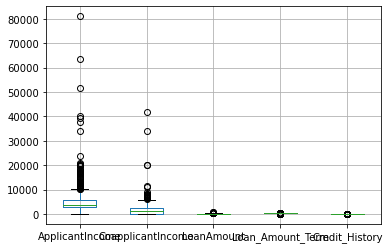

In [192]:
df.boxplot(numeric_columns)

In [193]:
categorical_columns = list(df.select_dtypes(include=object).columns)
categorical_columns.remove('Loan_ID')
categorical_columns.remove('Loan_Status')
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [194]:
for col in categorical_columns:
    print(col)
    print('*'*len(col))
    print(df[col].unique())

Gender
******
['Male' 'Female' nan]
Married
*******
['No' 'Yes' nan]
Dependents
**********
['0' '1' '2' '3+' nan]
Education
*********
['Graduate' 'Not Graduate']
Self_Employed
*************
['No' 'Yes' nan]
Property_Area
*************
['Urban' 'Rural' 'Semiurban']


In [195]:
#categorical_columns = df[categorical_columns]
#categorical_columns

## Handling missing Data

In [218]:
from sklearn.base import BaseEstimator, TransformerMixin
class NumericalFeatureCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,  df, y=None):
        print('Inside NumericalFeatureCleaner fit')
        return self
    
    def remove_outliers(self,X):
        for col in X.columns:
            q1 = X.quantile(0.25)
            q3 = X.quantile(0.75)
            IQR = q3-q1
            low = q1-1.5*IQR
            high = q3+1.5*IQR
            print('col : ', col)
            print('X[col] : ', X[col])
            
            X.loc[X[col] < low, col]=low
            X.loc[X[col] > high, col]=high
            
        return X        
    
    def transform(self, X, y = None):
        print('Inside NumericalFeatureCleaner transform')
        self.remove_outliers(X)
        return X    
                                   

In [197]:
from sklearn.base import BaseEstimator, TransformerMixin
class CategoricalFeatureCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def catToDummy(X):
        X = pd.get_dummies(X,drop_first=True)
        return X
    def transform(self, X, y=None):
        X = self.catToDummy(X)
        return X

In [198]:
pred_var = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome',
            'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [199]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [200]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':0,'N':1})
df['Loan_Status'].head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [201]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df[pred_var],df['Loan_Status'],test_size=0.2,random_state=42)

In [212]:
print(type(df['ApplicantIncome']))
df['ApplicantIncome'].values

<class 'pandas.core.series.Series'>


array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  2600,  3365,  3717,  9560,  2799,
        4226,  1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,
        1828,  3667,  4166,  3748,  3600,  1800,  2400,  3941,  4695,
        3410,  5649,  5821,  2645,  4000,  1928,  3086,  4230,  4616,
       11500,  2708,  2132,  3366,  8080,  3357,  2500,  3029,  2609,
        4945,  4166,  5726,  3200, 10750,  7100,  4300,  3208,  1875,
        3500,  4755,  5266,  3750,  3750,  1000,  3167,  3333,  3846,
        2395,  1378,  6000,  3988,  2366,  3333,  2500,  8566,  5695,
        2958,  6250,  3273,  4133,  3620,  6782,  2484,  1977,  4188,
        1759,  4288,  4843, 13650,  4652,  3816,  3052, 11417,  7333,
        3800,  2071,  5316,  2929,  3572,  7451,  5050, 14583,  3167,
        2214,  5568, 10408,  5667,  4166,  2137,  2957,  4300,  3692,
       23803,  3865,

In [219]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
transformer = ColumnTransformer(transformers=[
    ("numerical_transformer",NumericalFeatureCleaner(), numeric_columns),
   # ("missing_imputer", SimpleImputer(missing_values=None, strategy='most_frequent')),
    ('categorica_transformers', CategoricalFeatureCleaner(),categorical_columns)
], remainder='drop')

transformer.fit(X_train)

Inside NumericalFeatureCleaner fit
Inside NumericalFeatureCleaner transform
col :  ApplicantIncome
X[col] :  83      6000
90      2958
227     6250
482     2083
464     4166
       ...  
71      1875
106    11417
270     3237
435    10047
102    13650
Name: ApplicantIncome, Length: 491, dtype: int64


ValueError: Can only compare identically-labeled Series objects

In [108]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
227,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban
482,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban
464,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban


In [109]:
y_train.head()

83    NaN
90    NaN
227   NaN
482   NaN
464   NaN
Name: Loan_Status, dtype: float64

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[("pre-processor", transformer),
                       ("model", RandomForestClassifier())])

model.fit(X_train, y_train)

ValueError: not enough values to unpack (expected 3, got 2)